In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [71]:
df = pd.read_csv('quotes-2020.csv', sep = ";")
df = df.drop(['Unnamed: 0', 'numNumbers'], axis = 1)
df['lgNumOcc'] = np.log(df['numOccurrences'])
df['lgWords'] = np.log(df['numWords'])
df['lg_averageWordLength'] = np.log(df['averageWordLength'])
df['lg_largestWordLength'] = np.log(df['largestWordLength'])
df

,numWords,speaker,numOccurrences,averageWordLength,largestWordLength,numOfPunctuation,numRepeatedWords,date,lgNumOcc,lgWords,lg_averageWordLength,lg_largestWordLength
0,44,None,1,5.16,13,3,5,2020-01-28 08:04:05,0.000000,3.784190,1.640937,2.564949
1,14,Sue Myrick,1,5.21,10,1,0,2020-01-16 12:00:13,0.000000,2.639057,1.650580,2.302585
2,42,None,1,4.98,12,13,5,2020-02-10 23:45:54,0.000000,3.737670,1.605430,2.484907
3,7,None,2,2.57,5,4,0,2020-02-15 14:12:51,0.693147,1.945910,0.943906,1.609438
4,18,Meghan King Edmonds,4,4.11,8,4,1,2020-01-24 20:37:09,1.386294,2.890372,1.413423,2.079442
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,15,None,1,5.13,10,2,1,2020-03-19 16:31:28,0.000000,2.708050,1.635106,2.302585
99996,5,None,46,4.60,8,2,0,2020-03-24 00:00:00,3.828641,1.609438,1.526056,2.079442
99997,18,David Johnston,1,4.00,9,4,0,2020-03-12 21:06:56,0.000000,2.890372,1.386294,2.197225
99998,28,None,1,4.21,9,5,1,2020-01-07 03:27:00,0.000000,3.332205,1.437463,2.197225


In [117]:
df.describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).to_csv('Summary.csv')

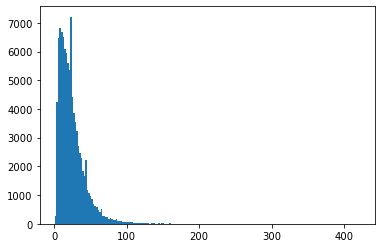

In [4]:
plt.hist(df.numWords, bins=200);

In [5]:
# Remove very large values
print(df.shape[0])
df_no_out = df[df.numWords < 100]
print(df_no_out.shape[0])

100000
99215


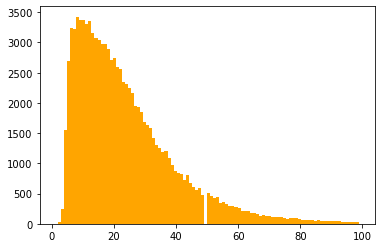

In [6]:
plt.hist(df_no_out.numWords, bins=100, color = 'orange');

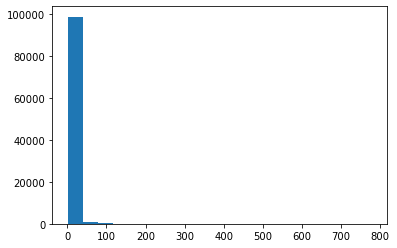

In [7]:
plt.hist(df.numOccurrences, bins=20);

100000
95231


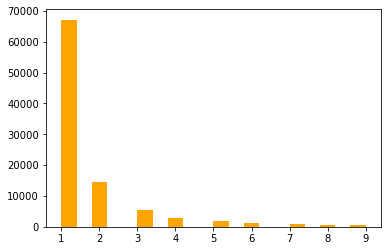

In [8]:
# Remove very large values
print(df.shape[0])
df_no_out = df[df.numOccurrences < 10]
print(df_no_out.shape[0])

plt.hist(df_no_out.numOccurrences, bins=20, color = 'orange');

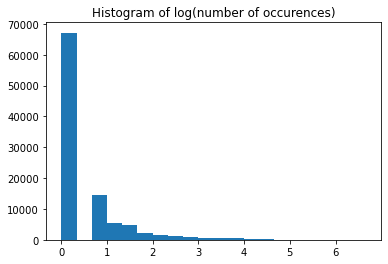

In [113]:
plt.hist(df.lgNumOcc, bins=20);
plt.title('Histogram of log(number of occurences)')
plt.savefig('HistLgNumOcc')

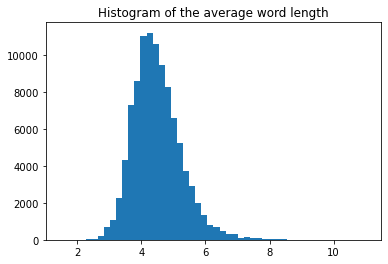

In [114]:
plt.hist(df.averageWordLength, bins=50);
plt.title('Histogram of the average word length')
plt.savefig('Hist_averageWordLength')

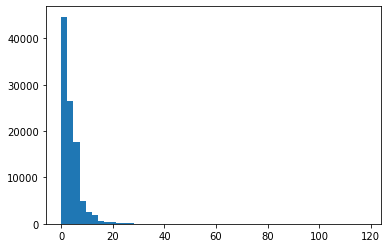

In [11]:
plt.hist(df.numOfPunctuation, bins=50);

100000
99855


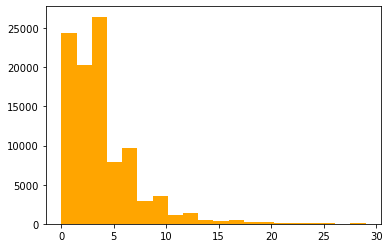

In [12]:
# Remove very large values
print(df.shape[0])
df_no_out = df[df.numOfPunctuation < 30]
print(df_no_out.shape[0])

plt.hist(df_no_out.numOfPunctuation, bins=20, color = 'orange');

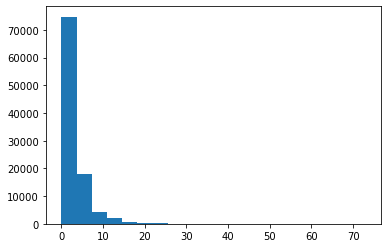

In [13]:
plt.hist(df.numRepeatedWords, bins=20);

100000
99807


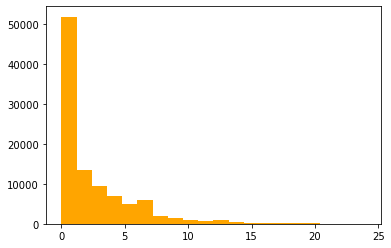

In [14]:
# Remove very large values
print(df.shape[0])
df_no_out = df[df.numRepeatedWords < 25]
print(df_no_out.shape[0])

plt.hist(df_no_out.numRepeatedWords, bins=20, color = 'orange');

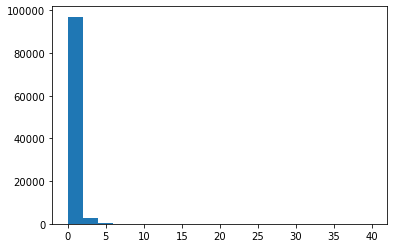

In [15]:
plt.hist(df.numNumbers, bins=20);

100000
95811


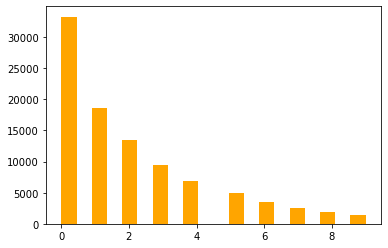

In [16]:
# Remove very large values
print(df.shape[0])
df_no_out = df[df.numRepeatedWords < 10]
print(df_no_out.shape[0])

plt.hist(df_no_out.numRepeatedWords, bins=20, color = 'orange');

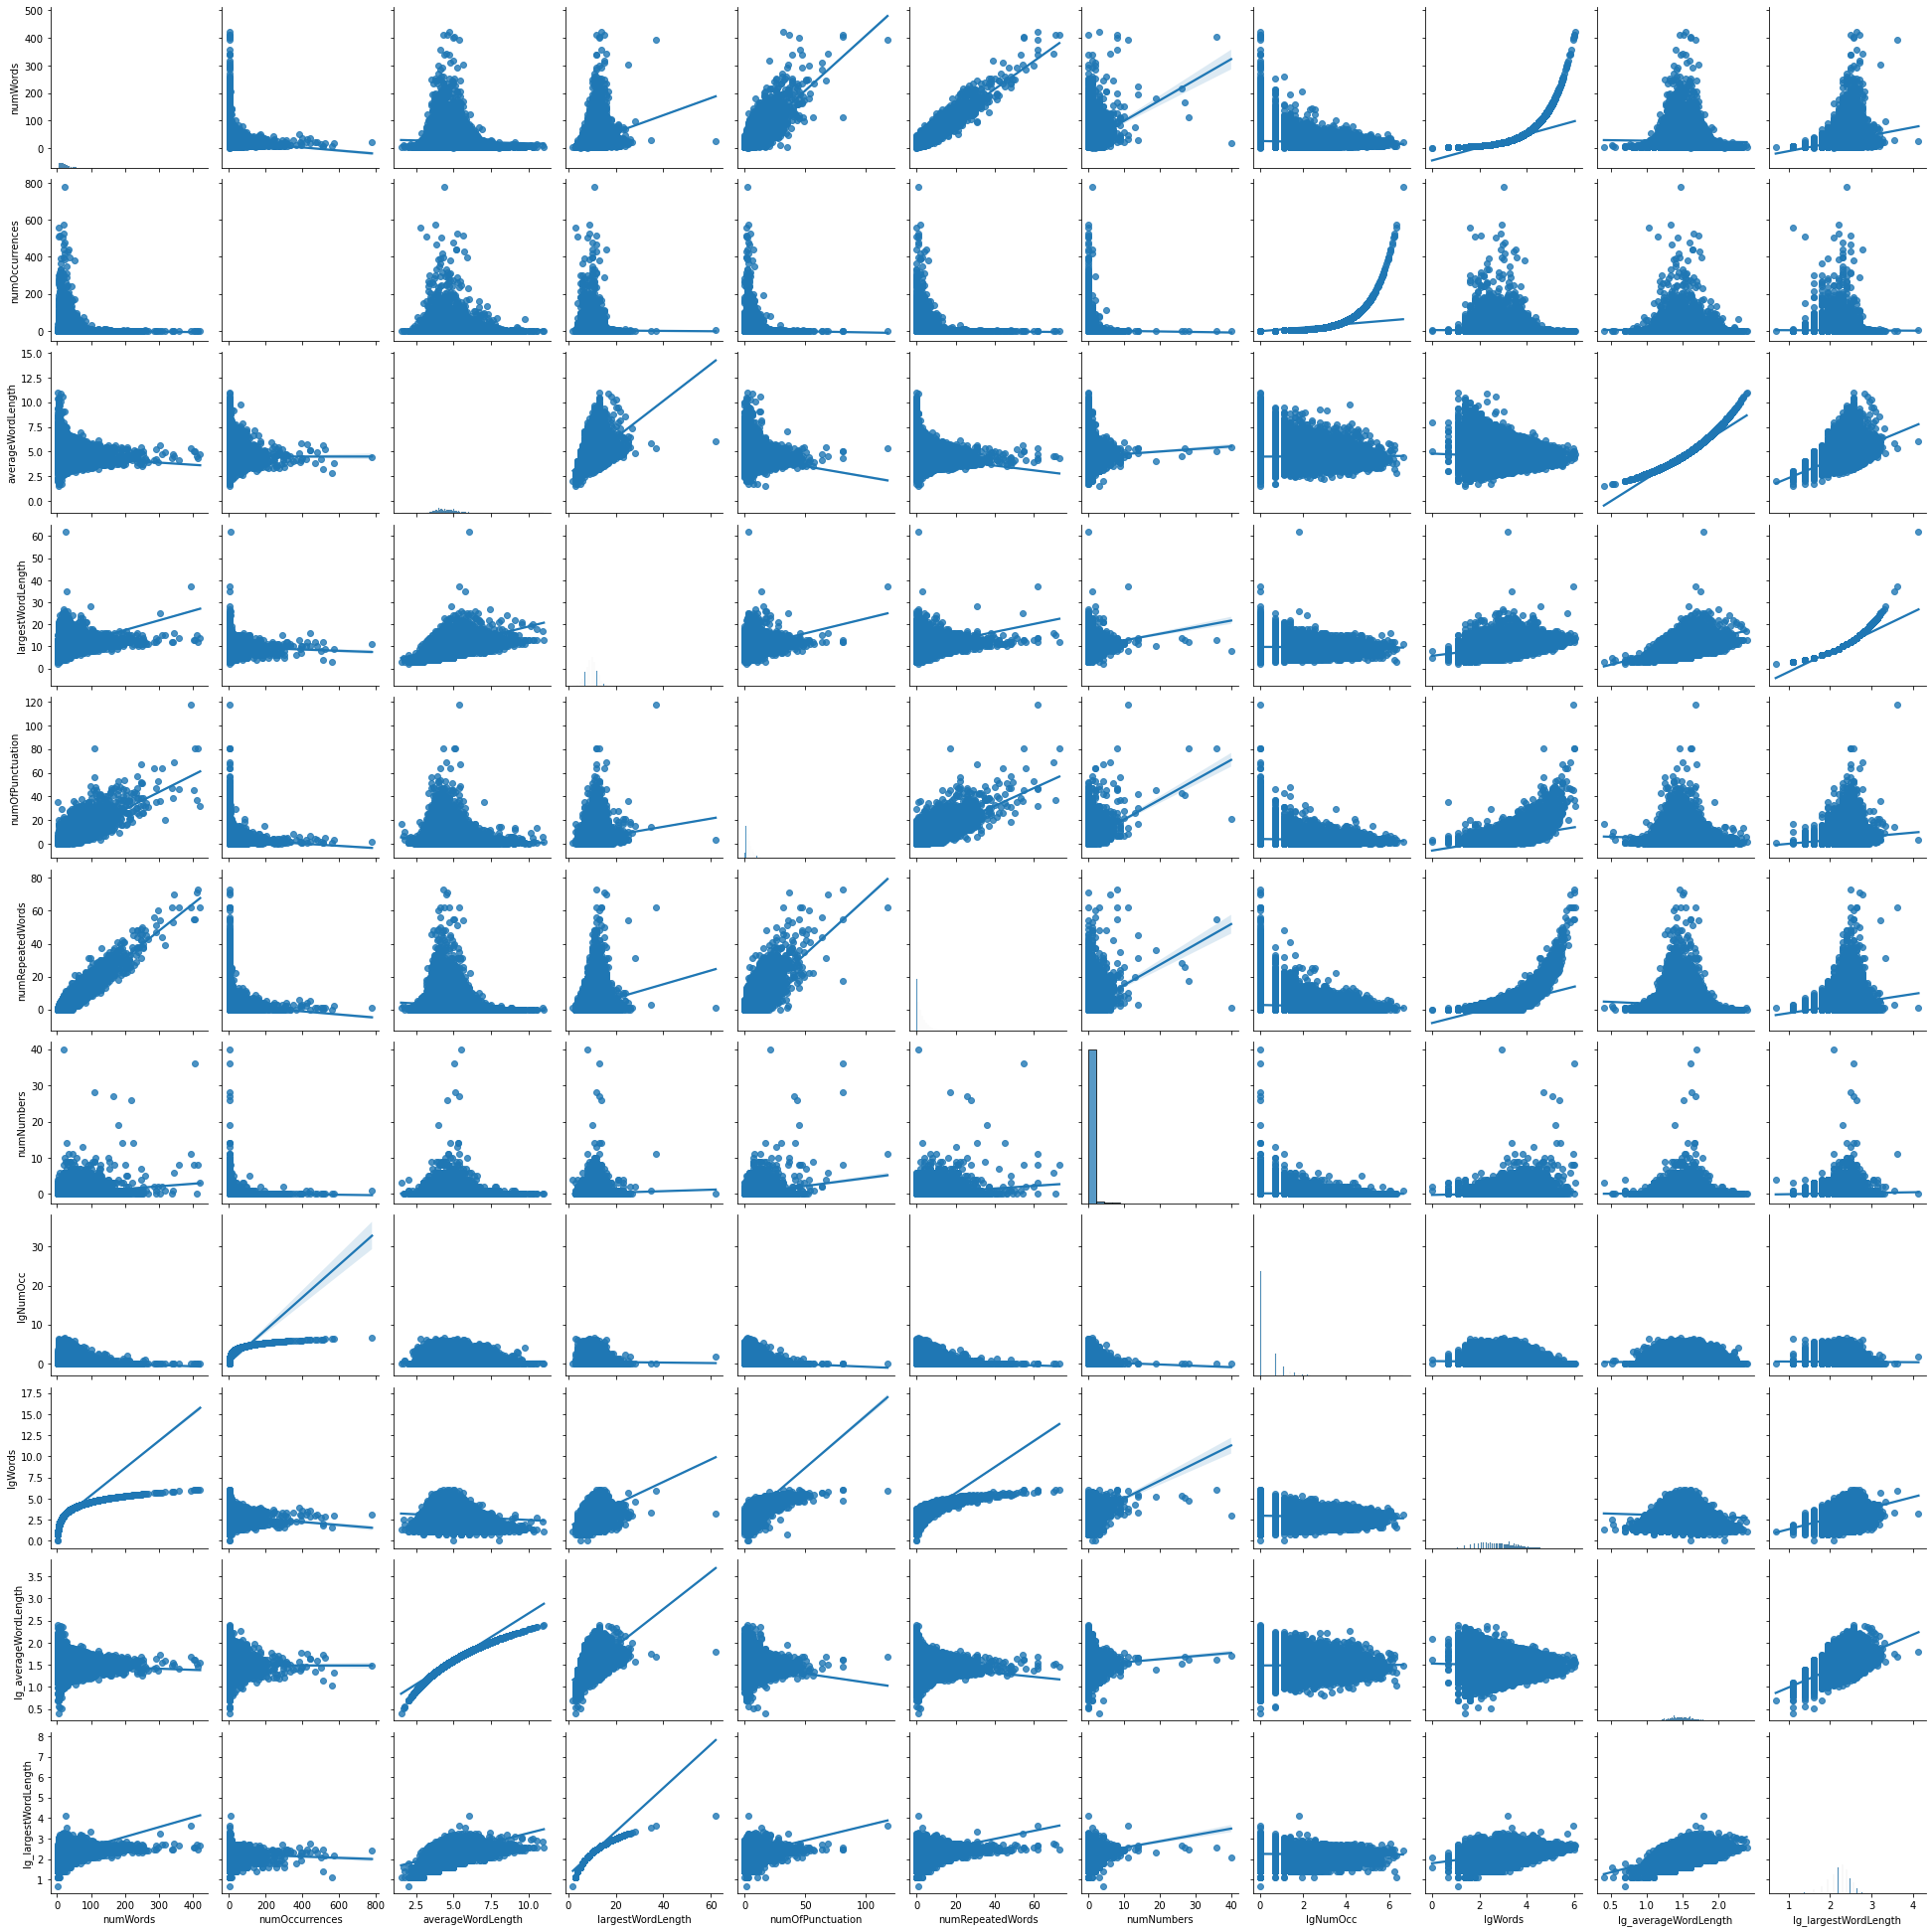

In [17]:
# Basic correlogram
#sns.pairplot(df, kind="reg")
#plt.show()

In [73]:
df.corr()

,numWords,numOccurrences,averageWordLength,largestWordLength,numOfPunctuation,numRepeatedWords,lgNumOcc,lgWords,lg_averageWordLength,lg_largestWordLength
numWords,1.000000,-0.037379,-0.056480,0.369668,0.759375,0.912597,-0.070886,0.874145,-0.031689,0.371109
numOccurrences,-0.037379,1.000000,0.000068,-0.016277,-0.032928,-0.034676,0.635445,-0.032431,-0.000305,-0.016395
averageWordLength,-0.056480,0.000068,1.000000,0.560991,-0.102510,-0.111502,0.011333,-0.095710,0.990954,0.569120
largestWordLength,0.369668,-0.016277,0.560991,1.000000,0.214946,0.276187,-0.017288,0.425991,0.586280,0.982222
numOfPunctuation,0.759375,-0.032928,-0.102510,0.214946,1.000000,0.711183,-0.058353,0.635044,-0.089980,0.212640
numRepeatedWords,0.912597,-0.034676,-0.111502,0.276187,0.711183,1.000000,-0.066552,0.753750,-0.095178,0.276318
lgNumOcc,-0.070886,0.635445,0.011333,-0.017288,-0.058353,-0.066552,1.000000,-0.056185,0.010203,-0.016144
lgWords,0.874145,-0.032431,-0.095710,0.425991,0.635044,0.753750,-0.056185,1.000000,-0.060464,0.443314
lg_averageWordLength,-0.031689,-0.000305,0.990954,0.586280,-0.089980,-0.095178,0.010203,-0.060464,1.000000,0.603026
lg_largestWordLength,0.371109,-0.016395,0.569120,0.982222,0.212640,0.276318,-0.016144,0.443314,0.603026,1.000000


<AxesSubplot:>

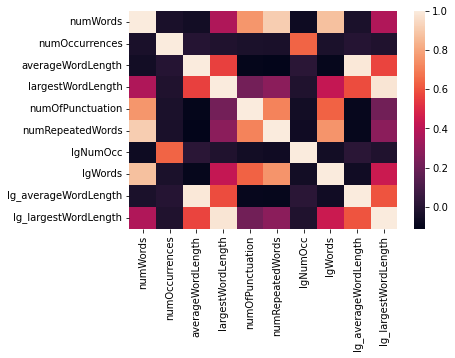

In [74]:
sns.heatmap(df.corr())

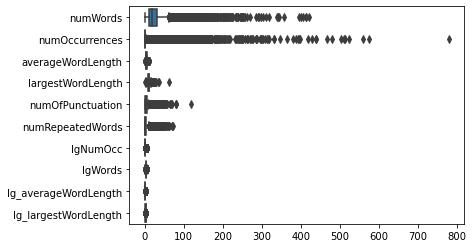

In [75]:
# Outliers analysis

ax = sns.boxplot(data=df, orient="h")

In [76]:
# Computing IQR

df_numerical = df.drop(['speaker', 'date'], axis = 1)

for col in df_numerical.columns:
    D1_col = df_numerical[col].quantile(0.1)
    D9_col = df_numerical[col].quantile(0.9)
    IDR_col = D9_col - D1_col
    df_numerical = df_numerical[(df_numerical[col] >= D1_col - 1.5*IDR_col) 
                                & (df_numerical[col] <= D9_col + 1.5*IDR_col)]
df_numerical

,numWords,numOccurrences,averageWordLength,largestWordLength,numOfPunctuation,numRepeatedWords,lgNumOcc,lgWords,lg_averageWordLength,lg_largestWordLength
0,44,1,5.16,13,3,5,0.000000,3.784190,1.640937,2.564949
1,14,1,5.21,10,1,0,0.000000,2.639057,1.650580,2.302585
2,42,1,4.98,12,13,5,0.000000,3.737670,1.605430,2.484907
3,7,2,2.57,5,4,0,0.693147,1.945910,0.943906,1.609438
4,18,4,4.11,8,4,1,1.386294,2.890372,1.413423,2.079442
...,...,...,...,...,...,...,...,...,...,...
99994,25,1,4.00,10,3,3,0.000000,3.218876,1.386294,2.302585
99995,15,1,5.13,10,2,1,0.000000,2.708050,1.635106,2.302585
99997,18,1,4.00,9,4,0,0.000000,2.890372,1.386294,2.197225
99998,28,1,4.21,9,5,1,0.000000,3.332205,1.437463,2.197225


In [77]:
df_numerical.describe()

,numWords,numOccurrences,averageWordLength,largestWordLength,numOfPunctuation,numRepeatedWords,lgNumOcc,lgWords,lg_averageWordLength,lg_largestWordLength
count,93184.000000,93184.000000,93184.000000,93184.000000,93184.000000,93184.000000,93184.000000,93184.000000,93184.000000,93184.000000
mean,23.571997,1.614183,4.486584,9.735759,3.639724,2.313004,0.302312,2.938931,1.487801,2.247082
std,15.758270,1.269824,0.744208,2.251711,2.956914,2.790657,0.521657,0.687515,0.162280,0.246000
min,1.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.693147,1.098612
25%,12.000000,1.000000,3.980000,8.000000,2.000000,0.000000,0.000000,2.484907,1.381282,2.079442
50%,20.000000,1.000000,4.400000,10.000000,3.000000,1.000000,0.000000,2.995732,1.481605,2.302585
75%,31.000000,2.000000,4.920000,11.000000,5.000000,3.000000,0.693147,3.433987,1.593309,2.397895
max,104.000000,8.000000,8.170000,22.000000,18.000000,15.000000,2.079442,4.644391,2.100469,3.091042


In [85]:
df_numerical.corr()[['numOccurrences']]

,numOccurrences
numWords,-0.040497
numOccurrences,1.000000
averageWordLength,0.013616
largestWordLength,-0.000732
numOfPunctuation,-0.027794
numRepeatedWords,-0.039178
lgNumOcc,0.958049
lgWords,-0.029086
lg_averageWordLength,0.012561
lg_largestWordLength,0.000152


In [84]:
df_numerical.corr()[['lgNumOcc']]

,lgNumOcc
numWords,-0.042158
numOccurrences,0.958049
averageWordLength,0.014987
largestWordLength,-0.000022
numOfPunctuation,-0.029201
numRepeatedWords,-0.040518
lgNumOcc,1.000000
lgWords,-0.030048
lg_averageWordLength,0.013741
lg_largestWordLength,0.000504


<AxesSubplot:>

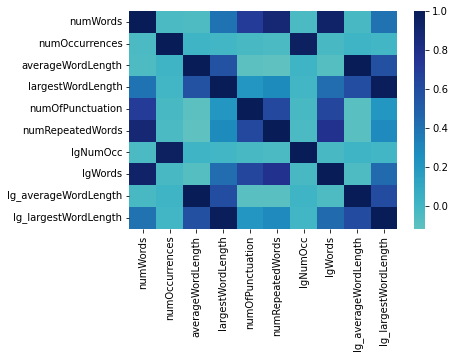

In [86]:
sns.heatmap(df_numerical.corr(), center=0, cmap="YlGnBu")

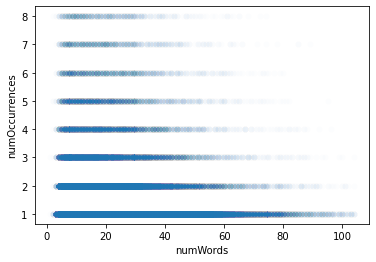

In [115]:
sns.scatterplot(data=df_numerical, x="numWords", y="numOccurrences", alpha = 0.01);
plt.savefig('Scatter_numWords')

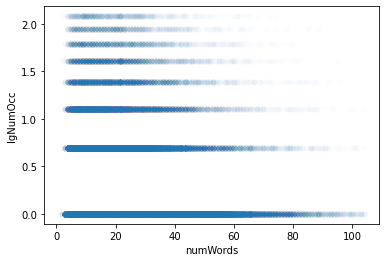

In [88]:
sns.scatterplot(data=df_numerical, x="numWords", y="lgNumOcc", alpha = 0.01);

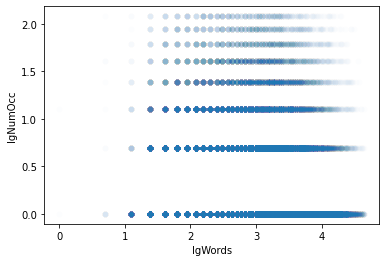

In [89]:
sns.scatterplot(data=df_numerical, x="lgWords", y="lgNumOcc", alpha = 0.01);

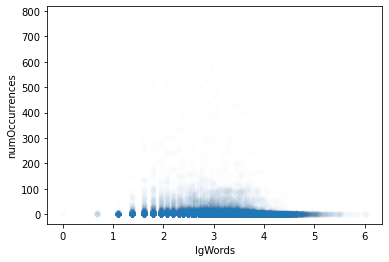

In [90]:
sns.scatterplot(data=df, x="lgWords", y="numOccurrences", alpha = 0.01);

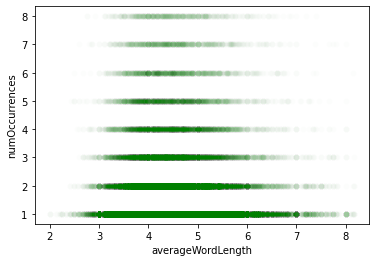

In [91]:
sns.scatterplot(data=df_numerical, x="averageWordLength", y="numOccurrences", alpha = 0.01, color = 'g');

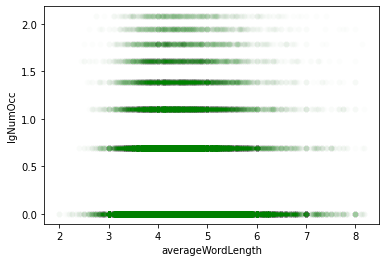

In [92]:
sns.scatterplot(data=df_numerical, x="averageWordLength", y="lgNumOcc", alpha = 0.01, color = 'g');

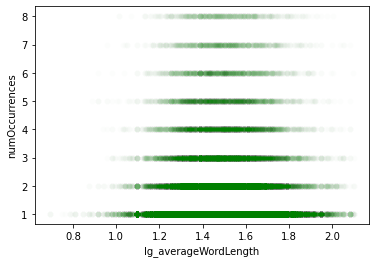

In [93]:
sns.scatterplot(data=df_numerical, x="lg_averageWordLength", y="numOccurrences", alpha = 0.01, color = 'g');

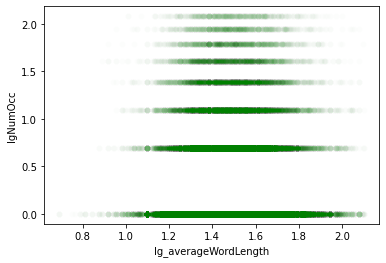

In [94]:
sns.scatterplot(data=df_numerical, x="lg_averageWordLength", y="lgNumOcc", alpha = 0.01, color = 'g');

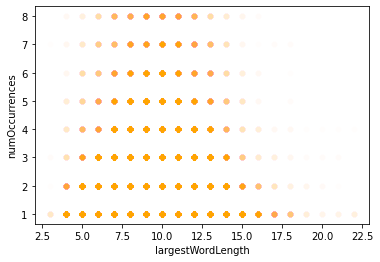

In [95]:
sns.scatterplot(data=df_numerical, x="largestWordLength", y="numOccurrences", alpha = 0.01, color = 'orange');

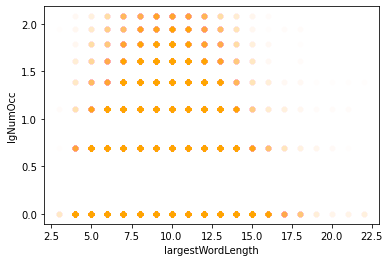

In [96]:
sns.scatterplot(data=df_numerical, x="largestWordLength", y="lgNumOcc", alpha = 0.01, color = 'orange');

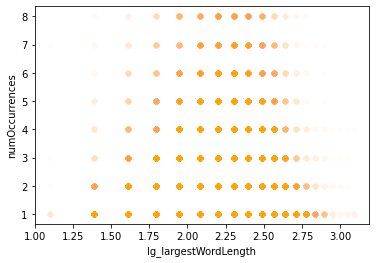

In [97]:
sns.scatterplot(data=df_numerical, x="lg_largestWordLength", y="numOccurrences", alpha = 0.01, color = 'orange');

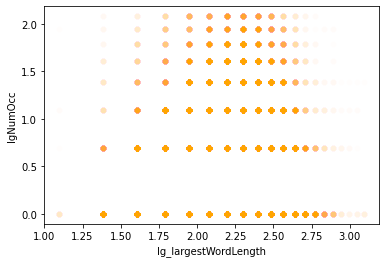

In [98]:
sns.scatterplot(data=df_numerical, x="lg_largestWordLength", y="lgNumOcc", alpha = 0.01, color = 'orange');

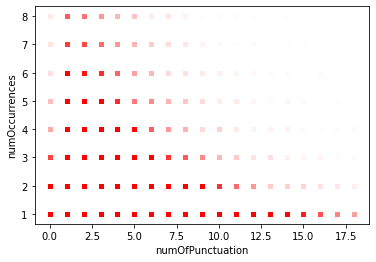

In [116]:
sns.scatterplot(data=df_numerical, x="numOfPunctuation", y="numOccurrences", alpha = 0.005, color = 'r');
plt.savefig('Scatter_numOfPunctuation')

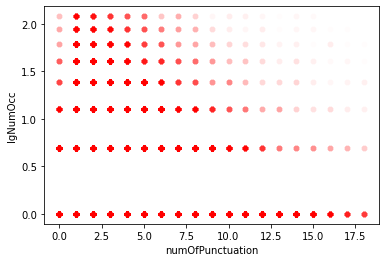

In [100]:
sns.scatterplot(data=df_numerical, x="numOfPunctuation", y="lgNumOcc", alpha = 0.01, color = 'r');

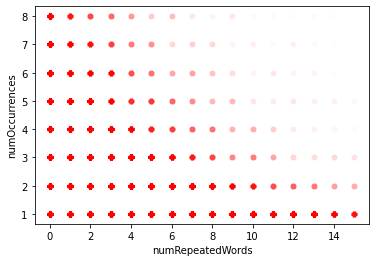

In [101]:
sns.scatterplot(data=df_numerical, x="numRepeatedWords", y="numOccurrences", alpha = 0.01, color = 'r');

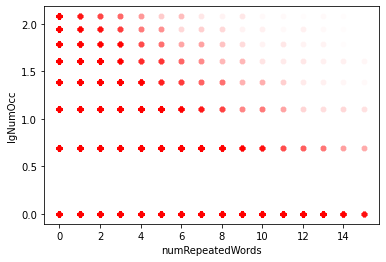

In [102]:
sns.scatterplot(data=df_numerical, x="numRepeatedWords", y="lgNumOcc", alpha = 0.01, color = 'r');

In [30]:
for col in df.columns:
    print(col)

numWords
speaker
numOccurrences
averageWordLength
largestWordLength
numOfPunctuation
numRepeatedWords
numNumbers
date
lgNumOcc
lgWords
lg_averageWordLength
lg_largestWordLength


In [106]:
df[df['numOccurrences'] > 50].corr()['numOccurrences']

numWords               -0.073457
numOccurrences          1.000000
averageWordLength      -0.035865
largestWordLength      -0.068056
numOfPunctuation       -0.056433
numRepeatedWords       -0.067933
lgNumOcc                0.928211
lgWords                -0.067611
lg_averageWordLength   -0.036352
lg_largestWordLength   -0.085297
Name: numOccurrences, dtype: float64

In [103]:
df_numerical.corr()['numOccurrences']

numWords               -0.040497
numOccurrences          1.000000
averageWordLength       0.013616
largestWordLength      -0.000732
numOfPunctuation       -0.027794
numRepeatedWords       -0.039178
lgNumOcc                0.958049
lgWords                -0.029086
lg_averageWordLength    0.012561
lg_largestWordLength    0.000152
Name: numOccurrences, dtype: float64